In [58]:
%matplotlib inline
from IEX import *
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import matplotlib
matplotlib.rcParams['figure.figsize'] = 25,25

In [12]:
df = Loader().load_historical_frame('tech')

In [13]:
df = df[df.ticker == 'MSFT']
df['date'] = pd.to_datetime(df.date)

# Get start and end of each month - MSFT only

In [14]:
ends_of_month_indices = set()

years = df.date.dt.year.unique()
months = df.date.dt.month.unique()

for year in years:
    for month in months:
        _df = df[(df.date.dt.year == year) & (df.date.dt.month == month)]
        
        try:
            start = int(_df.head(1).index.values)
            end = int(_df.tail(1).index.values)
        except:
            pass
        
        ends_of_month_indices.add(start)
        ends_of_month_indices.add(end)

In [15]:
ends = df.loc[ends_of_month_indices].sort_index()

ends = ends.loc[:,['date', 'high', 'low', 'volume', 'open', 'close', 'ticker']]

ends.reset_index(drop=True, inplace=True)

ends['avg'] = (ends.high + ends.low)/2

ends.set_index('date', inplace=True)

ends.drop('ticker', axis=1, inplace=True)

ends['diff'] = ends.avg.diff()

In [55]:
df_end_of_month = ends[1::2].reset_index()

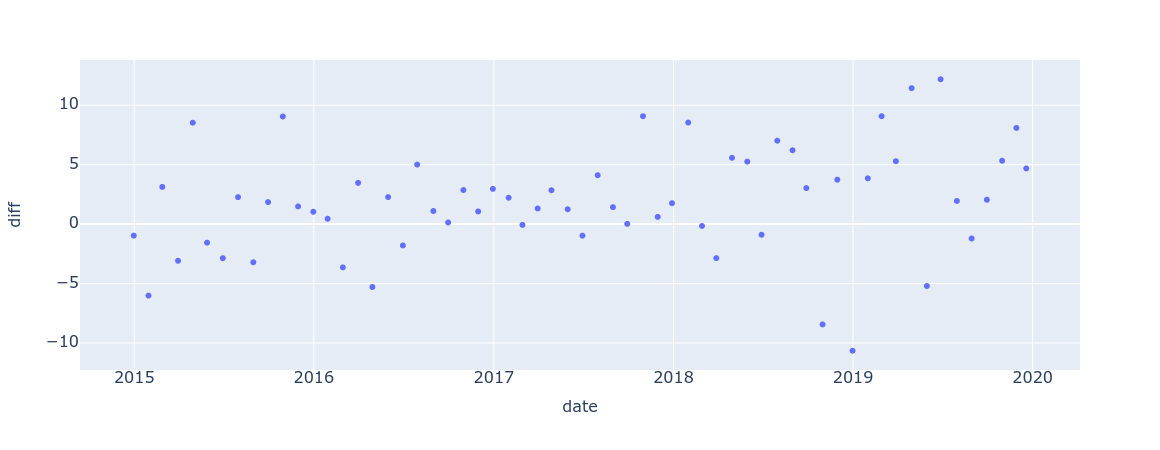

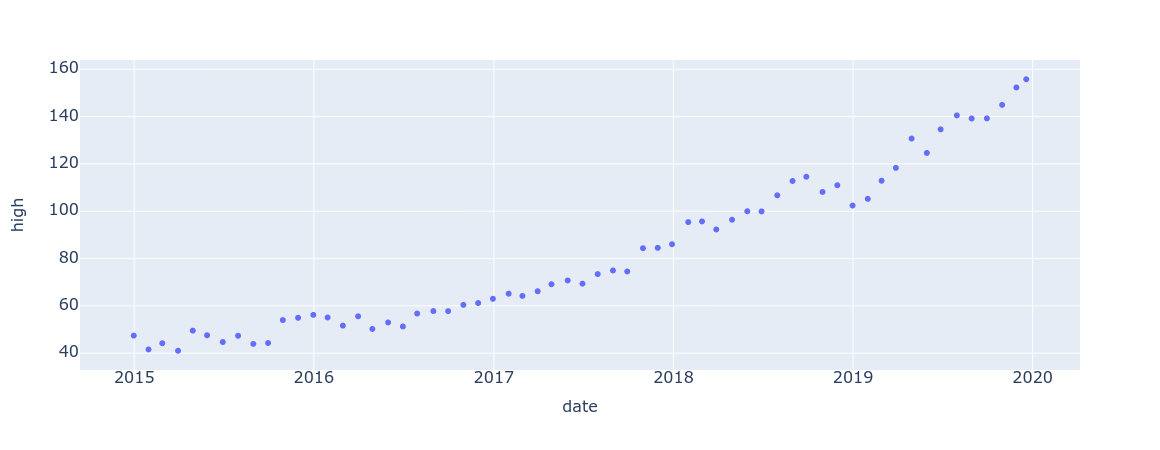

In [57]:
px.scatter(df_end_of_month, x='date', y='diff').show()

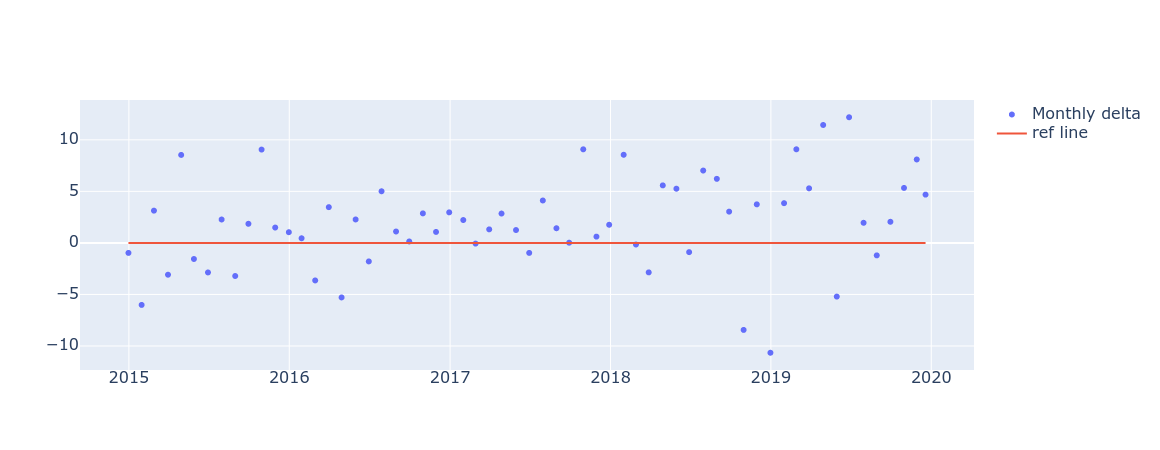

In [64]:
go.Figure([
    go.Scatter(x=df_end_of_month['date'], y=df_end_of_month['diff'], mode='markers', name='Monthly delta'),
    go.Scatter(x=df_end_of_month['date'], y=[0 for i in range(df_end_of_month.shape[0])], name='ref line')
])

In [105]:
m_rise_prob = df_end_of_month[df_end_of_month['diff'] >= 0].shape[0]/ df_end_of_month.shape[0]
m_rise_prob

0.7049180327868853

# Weekly delta - MSFT only

In [77]:
weekly_monday = df.reset_index().groupby(pd.Grouper(key='date', freq='W-MON')).ticker.count().index
weekly_friday = df.reset_index().groupby(pd.Grouper(key='date', freq='W-FRI')).ticker.count().index

In [83]:
df.set_index('date',inplace=True)

idx = []

for mon, fri in zip(weekly_monday, weekly_friday):
    idx.append(
        df.index.get_loc(mon, method='nearest')
    )
    idx.append(
        df.index.get_loc(fri, method='nearest')
    )

In [92]:
week = df.iloc[idx].copy()

In [93]:
week = week.iloc[:, 0:5]

In [99]:
week['avg'] = week[['open', 'close']].mean(axis=1)
week['diff_avg'] = week.avg.diff()

In [100]:
res = week[1::2]

In [104]:
go.Figure([
    go.Scatter(x=res.index, y=res['diff_avg'], mode='markers', name='Weekly delta'),
    go.Scatter(x=res.index, y=[0 for i in range(res.shape[0])], name='ref line')
])

In [107]:
wk_rise_prob = res[res['diff_avg'] >= 0].shape[0]/ res.shape[0]
wk_rise_prob

0.5938697318007663